In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../reports/eval/both_ends.csv')

In [3]:
for col in 'frm1 frm2 to1 to2'.split():
    df[col] = df[col].apply(lambda x:float(f'{x:0.2f}'))

In [4]:
df_copy = df.rename(columns={'frm1':'frm2','frm2':'frm1','to1':'to2','to2':'to1'})

In [5]:
df = pd.concat([df,df_copy],ignore_index=True)

In [6]:
df = df.groupby('dataset frm1 frm2'.split()).mean()['acc'].reset_index()

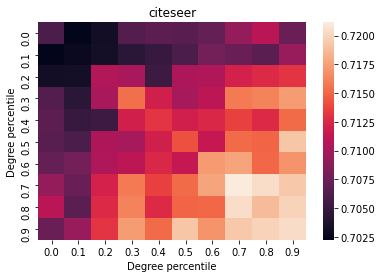

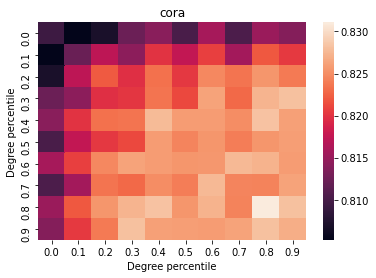

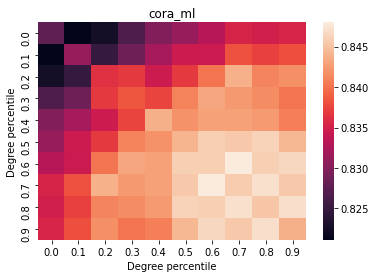

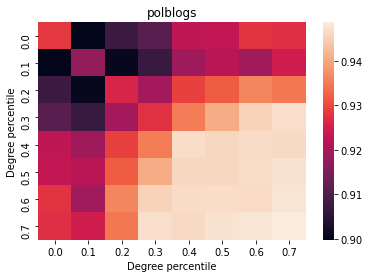

In [7]:
for dataset in df.dataset.unique():
    plt.figure()
    cdf = df[df.dataset == dataset]
    cdf = cdf.pivot('frm1','frm2','acc')
    sns.heatmap(cdf)
    plt.title(dataset)
    plt.xlabel('Degree percentile')
    plt.ylabel('Degree percentile')
    plt.savefig(f'../reports/figures/edge-ends-degree/{dataset}.pdf',bbox_inches='tight')
    plt.show()